In [294]:
import datetime
import pandas as pd
from scipy.stats import norm
from scipy.stats import alpha
from scipy.stats import lognorm

In [295]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jérémie\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [296]:
vente = pd.read_csv('E:/eDocuments/obso/ventes_totales.csv', sep=';')

In [297]:
gantt = pd.read_csv('E:/eDocuments/obso/gantt_iPhones.csv', sep=';')

In [298]:
vente.head()

,Trimestre,Vente
0,30/09/2007,270000
1,31/12/2007,1120000
2,31/03/2008,2320000
3,30/06/2008,1700000
4,30/09/2008,720000


In [299]:
gantt.head()

,Modèle,date début,date fin
0,iPhone_2G,30/06/2007,30/06/2008
1,iPhone_3G,30/06/2008,31/05/2010
2,iPhone_3GS,30/06/2009,30/09/2012
3,iPhone_4,30/06/2010,30/09/2013
4,iPhone_4S,31/10/2011,30/09/2014


In [300]:
debut = [datetime.date(int(d.split("/")[2]),int(d.split("/")[1]),int(d.split("/")[0])) for d in gantt["date début"]]

In [301]:
fin = [datetime.date(int(d.split("/")[2]),int(d.split("/")[1]),int(d.split("/")[0])) for d in gantt["date fin"]]

In [302]:
trimestre = [datetime.date(int(d.split("/")[2]),int(d.split("/")[1]),int(d.split("/")[0])).toordinal() for d in vente["Trimestre"]]

$\forall x > 0, \forall a> 0, f(x,a) = \frac{1}{x^2 \Phi(a) \sqrt{2 \pi}} \times \exp(-\frac{1}{2}(a-1/x)^2)$ avec $\Phi$ la loi normale $f$ est une fonction de densité de probabilité.

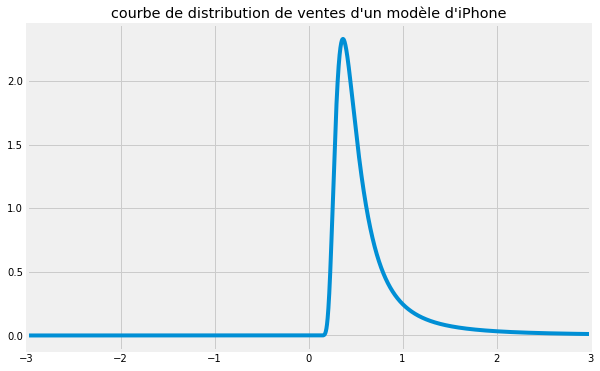

In [303]:
def distrib(x,centre,scale):
    #return norm.pdf(x,centre,scale)*scale
    #return lognorm.pdf(x, 2, centre, scale)*scale
    return alpha.pdf(x, 2, centre, scale)*scale
    

x = np.arange(-10, 10, 0.001)
y = distrib(x,0,1)
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(x,y)

ax.set_xlim([-3,3])
ax.set_title("courbe de distribution de ventes d'un modèle d'iPhone")

plt.show()

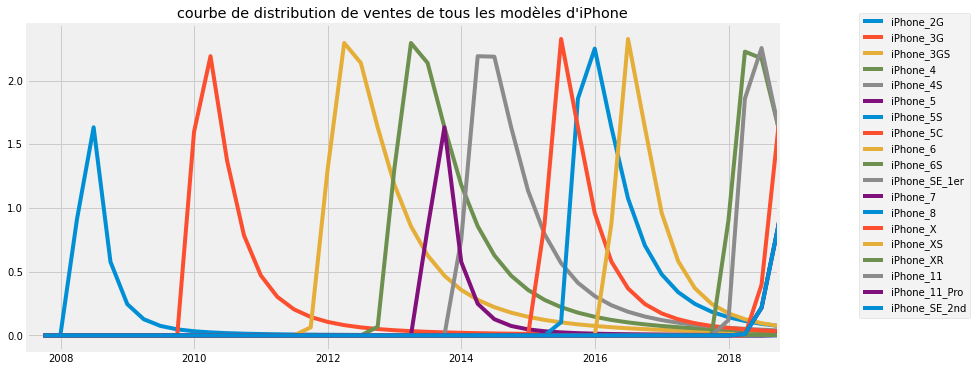

In [304]:
def specialize(date_debut, date_fin, trimestre):
    #print(date_trimestre.toordinal(),date_debut.toordinal()+(date_fin.toordinal()-date_debut.toordinal())/2,date_fin.toordinal()-date_debut.toordinal())
    delta = date_fin.toordinal()-date_debut.toordinal()
    return distrib(trimestre, date_debut.toordinal()+delta/2, delta)


fig, ax = plt.subplots(figsize=(12,6))
for i,iPhone in enumerate(gantt["Modèle"]):
    
    x = trimestre
    y = specialize(debut[i], fin[i], x)


    ax.plot(x, y, label=iPhone)
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    ax.set_xlim([debut[0],fin[10]])
    ax.set_title("courbe de distribution de ventes de tous les modèles d'iPhone")

plt.show()

In [305]:
Som = []
for t in trimestre:    
    somme = 0
    for i,iPhone in enumerate(gantt["Modèle"]): 
        somme += specialize(debut[i], fin[i], t)
    Som.append(somme)

for i,iPhone in enumerate(gantt["Modèle"]): 
    globals()[iPhone] = []
    
for d,t in enumerate(trimestre): 
    for i,iPhone in enumerate(gantt["Modèle"]):
        if Som[d] == 0:
            globals()[iPhone].append(0)
        else :
            globals()[iPhone].append(specialize(debut[i],fin[i],t)*vente["Vente"][d]/Som[d])


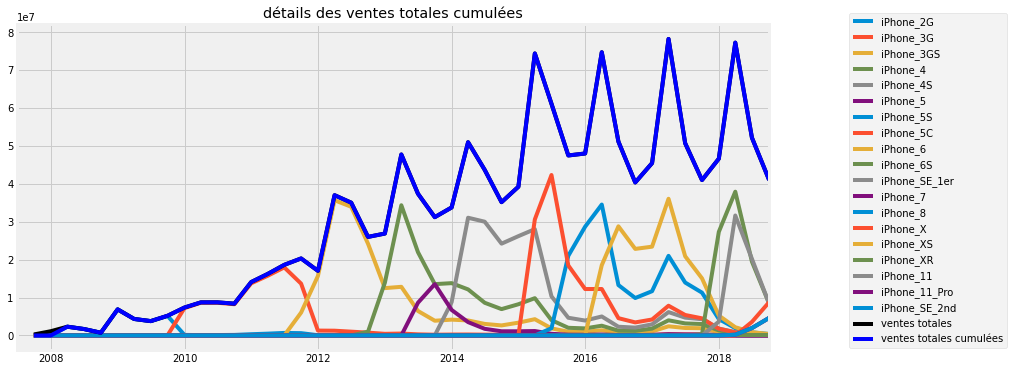

In [306]:
ventes = []
for d,t in enumerate(trimestre):
    som = 0
    for iPhone in gantt["Modèle"]:  
        som += globals()[iPhone][d]
    ventes.append(som)

    
fig, ax = plt.subplots(figsize=(12,6))
x = trimestre

for iPhone in gantt["Modèle"]:      
    ax.plot(x,globals()[iPhone], label=iPhone)
    ax.set_xlim([debut[0],fin[10]])

ax.plot(x,vente["Vente"], 'k', label="ventes totales")
ax.set_xlim([debut[0],fin[10]])

ax.plot(x,ventes, 'b', label="ventes totales cumulées")
ax.set_xlim([debut[0],fin[10]])

ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title("détails des ventes totales cumulées")
plt.show()

In [307]:
for iPhone in gantt["Modèle"]:
    vente[iPhone]=[round(x) for x in globals()[iPhone]]
vente.head()

,Trimestre,Vente,iPhone_2G,iPhone_3G,iPhone_3GS,iPhone_4,iPhone_4S,iPhone_5,iPhone_5S,iPhone_5C,...,iPhone_6S,iPhone_SE_1er,iPhone_7,iPhone_8,iPhone_X,iPhone_XS,iPhone_XR,iPhone_11,iPhone_11_Pro,iPhone_SE_2nd
0,30/09/2007,270000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31/12/2007,1120000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31/03/2008,2320000,2320000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30/06/2008,1700000,1700000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30/09/2008,720000,720000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
vente.tail()

,Trimestre,Vente,iPhone_2G,iPhone_3G,iPhone_3GS,iPhone_4,iPhone_4S,iPhone_5,iPhone_5S,iPhone_5C,...,iPhone_6S,iPhone_SE_1er,iPhone_7,iPhone_8,iPhone_X,iPhone_XS,iPhone_XR,iPhone_11,iPhone_11_Pro,iPhone_SE_2nd
41,31/12/2017,46680000,20405.0,128527.0,861596.0,1329219.0,1825340.0,110231.0,4336119.0,1787503.0,...,27355203.0,3658050.0,0.0,0.0,0.0,0.0,0.0,525.0,525.0,525.0
42,31/03/2018,77320000,10895.0,67616.0,440984.0,667476.0,889195.0,55069.0,1933295.0,818416.0,...,37964990.0,31684428.0,0.0,0.0,0.0,0.0,0.0,203418.0,203418.0,203418.0
43,30/06/2018,52220000,5439.0,33283.0,211483.0,314463.0,407449.0,25841.0,818976.0,355189.0,...,19504124.0,20230328.0,0.0,0.0,3582496.0,0.0,0.0,1954988.0,1954988.0,1954988.0
44,30/09/2018,41300000,3059.0,18467.0,114471.0,167410.0,211463.0,13716.0,396349.0,175728.0,...,8676815.0,8676815.0,26197.0,0.0,8676815.0,0.0,0.0,4581766.0,4581766.0,4581766.0
45,31/12/2018,46890000,2914.0,17367.0,105175.0,151469.0,186951.0,12383.0,329403.0,148980.0,...,6115309.0,5691906.0,4783296.0,0.0,2808047.0,0.0,0.0,8740316.0,8740316.0,8740316.0


In [309]:
vente.to_csv("E:/eDocuments/obso/ventes_détaillées.csv")